# API-201 ABC REVIEW SESSION #5
**October 14, 2022**

## Organizing your final exercise

### Recommended workflow:
1. Download original (raw) data files and don't modify them directly.
2. Prepare data for analysis by creating cleaned versions of your data.
3. Upload cleaned data to Google Colab.
4. Create your Jupyter notebook on Colab.

## Structuring your data in Excel

### Rules:
* First row should be variable names.
    + Variable names should start with a letter and can contain numbers, letters, underscores, and periods.
* Each other row should contain one observation that corresponds to your unit of analysis.


### Recommendations:
* All data in one Excel file, possibly across several sheets.
* R can't read formatting, so don't code your data that way.

## Uploading data to Colab

1. Create a new notebook on Colab.
2. Connect to an R runtime on Colab.
3. Click the file browser logo on the left.
4. Click the button to "Upload to session storage." Upload your data file to Colab.

__Whenever you disconnect from Colab's R runtime, your data will be removed from Colab. You'll have to re-upload it when you next start an R session on Colab.__


## Loading data into R



Once you've uploaded the data file to Colab, that file is accessible to R. We want to tell R to read that file into its memory as a data frame.

Until now, we've been giving you all the code to load datasets into R in a setup cell. That cell always contained `library(tidyverse)` to load tidyverse functions like `filter`, `mutate`, etc. 

Occasionally it also contained `library(readxl)` which loads the function `read_excel` which you can use to read Excel files into R. Run the cell below so you can use `read_excel`. 



In [1]:
# SETUP - Run this first!
library(tidyverse) # imports tidyverse functions you've been using
library(readxl) # imports read_excel()

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.1     ✔ forcats 0.5.2

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Now we are going to load data from the first sheet of `bigmac_analysis.xlsx`. `read_excel` requires a `path` argument, which specifies the name of the Excel file. You can also provide a `sheet` argument which indicates the name or number of the sheet within the Excel file. To load the first sheet, specify `sheet = 1`. You could instead omit the `sheet` argument in this case because `read_excel` reads the first sheet of the file by default.

In the cell below, we load the first sheet and name the dataset `bigmac_wide`. 

In [2]:
# Load data - specify you want to load the first sheet (same as default)
bigmac_wide <- read_excel(path = "bigmac_analysis.xlsx", sheet = 1)
head(bigmac_wide)

country_name,country_code,dollar_price_jan2020,dollar_price_jan2021,dollar_price_jan2022
<chr>,<chr>,<dbl>,<dbl>,<dbl>
United Arab Emirates,ARE,4.015627,4.015627,4.628306
Argentina,ARG,2.846887,3.748231,4.285041
Australia,AUS,4.451145,4.984740,4.509120
Azerbaijan,AZE,2.328323,2.324897,2.648617
Bahrain,BHR,3.713528,3.978780,3.978780
Brazil,BRA,4.804558,3.978491,4.312618


To load the second sheet of the file, you can specify `sheet = 2`. 

In the cell below, we load the second sheet and name the dataset `bigmac_long`. 

In [3]:
# Load data - specify you want to load the second sheet
bigmac_long <- read_excel(path = "bigmac_analysis.xlsx", sheet = 2)
head(bigmac_long)

country_name,country_code,year,dollar_price
<chr>,<chr>,<dbl>,<dbl>
United Arab Emirates,ARE,2022,4.628306
Argentina,ARG,2022,4.285041
Australia,AUS,2022,4.509120
Azerbaijan,AZE,2022,2.648617
Bahrain,BHR,2022,3.978780
Brazil,BRA,2022,4.312618


Alternatively, we can specify the name of the sheet rather than its number. If you are frequently reordering the sheets in your Excel file, you may prefer to load data this way.

In the cell below, we load the sheet named long and again name the dataset `bigmac_long`. 

In [4]:
# Load data - specify you want to load sheet named "long"
bigmac_long <- read_excel(path = "bigmac_analysis.xlsx", sheet = "long")
head(bigmac_long)

country_name,country_code,year,dollar_price
<chr>,<chr>,<dbl>,<dbl>
United Arab Emirates,ARE,2022,4.628306
Argentina,ARG,2022,4.285041
Australia,AUS,2022,4.509120
Azerbaijan,AZE,2022,2.648617
Bahrain,BHR,2022,3.978780
Brazil,BRA,2022,4.312618


## Stop here

In [33]:
# Calculate inflation rates
bigmac_inflation <- bigmac_wide %>%
    filter(country_name != "Euro area") %>%
    mutate(bm_inflation_jan2021 = 100 * (dollar_price_jan2021 - dollar_price_jan2020) / dollar_price_jan2020,
           bm_inflation_jan2022 = 100 * (dollar_price_jan2022 - dollar_price_jan2021) / dollar_price_jan2021,
           bm_inflation_jan2022_groups = cut(bm_inflation_jan2022, breaks = c(-Inf, -10, -5, 0, 5, 10, 20, Inf)))


In [34]:
# Sort countries by 2022 year-over-year big mac inflation
bigmac_inflation %>%
    arrange(desc(bm_inflation_jan2022)) %>%
    head(5)

country_name,country_code,dollar_price_jan2020,dollar_price_jan2021,dollar_price_jan2022,bm_inflation_jan2021,bm_inflation_jan2022,bm_inflation_jan2022_groups
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Lebanon,LBN,4.293263,1.771429,3.255814,-58.7393407,83.79595,"(20, Inf]"
Mexico,MEX,2.656678,2.684597,3.341566,1.0509203,24.47179,"(20, Inf]"
South Africa,ZAF,2.154124,2.158158,2.579186,0.1872412,19.50868,"(10,20]"
United Arab Emirates,ARE,4.015627,4.015627,4.628306,0.0000000,15.25738,"(10,20]"
Argentina,ARG,2.846887,3.748231,4.285041,31.6606796,14.32168,"(10,20]"


In [23]:
# Calculate average inflation across countries
summarize(bigmac_inflation, 
          "Average Inflation Jan. 2021" = mean(bm_inflation_jan2021), 
          "Average Inflation Jan. 2022" = mean(bm_inflation_jan2022))

# Calculate correlation between inflation in 2021 and 2022
summarize(bigmac_inflation, 
          "Correlation between Inflation in 2021 and 2022" = cor(bm_inflation_jan2021, bm_inflation_jan2022))



Average Inflation Jan. 2021,Average Inflation Jan. 2022
<dbl>,<dbl>
2.941976,3.399994


Correlation between Inflation in 2021 and 2022
<dbl>
-0.6346036


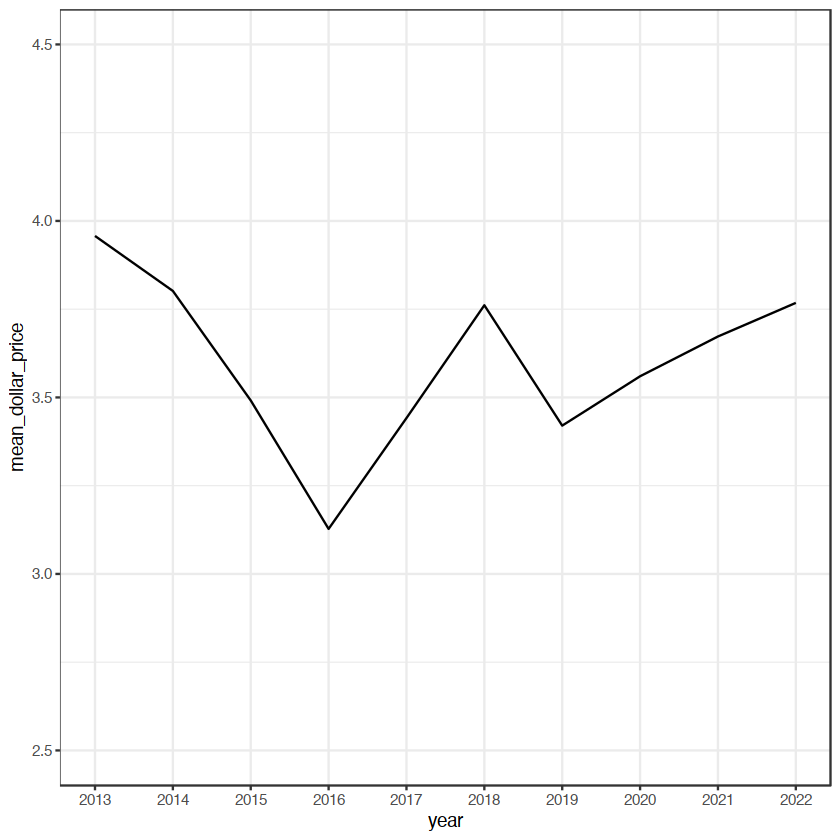

In [24]:
# Calculate average prices in each year
average_prices <- bigmac_long %>%
    group_by(year) %>%
    summarize(mean_dollar_price = mean(dollar_price)) 

# Plot trend in average price
ggplot(average_prices, aes(x = year, y = mean_dollar_price)) +
    geom_line() +
    scale_y_continuous(limits = c(2.50, 4.50)) +
    scale_x_continuous(breaks = 2013:2022, minor_breaks = NULL) +
    theme_bw()

## Maps?

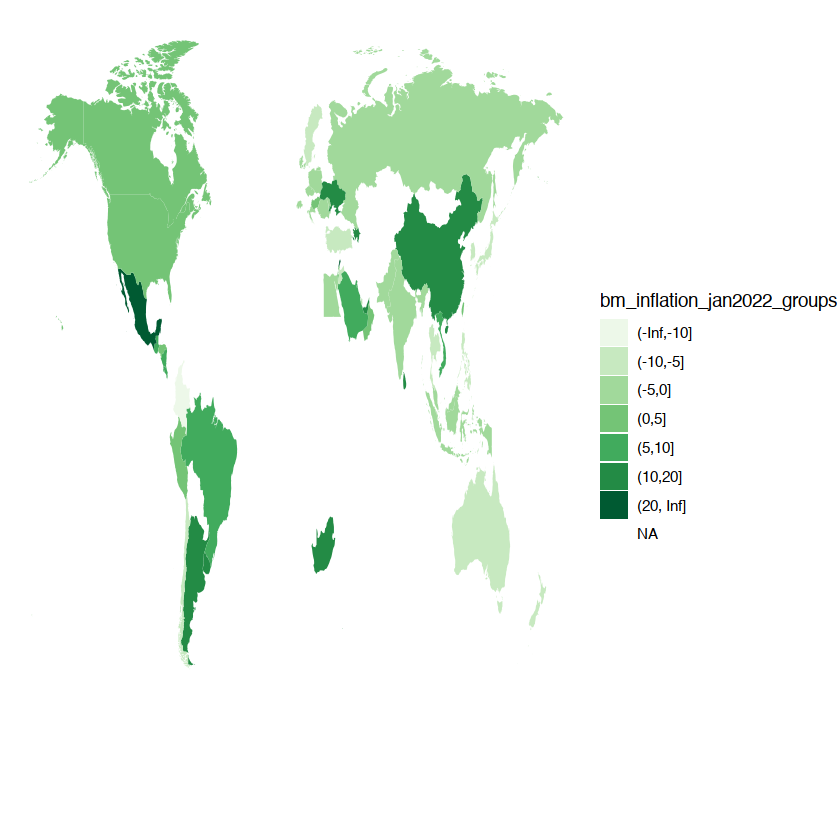

In [230]:


world_map <- map_data("world")



countries <- world_map %>% 
    distinct(region) %>% 
    rowid_to_column() %>%
    left_join(maps::iso3166, by = c("region" = "mapname")) %>%
    left_join(bigmac_inflation, by = c("a3" = "country_code"))



countries %>% 
  ggplot(aes(fill = bm_inflation_jan2022_groups, map_id = region)) +
  geom_map(map = world_map) +
  expand_limits(x = world_map$long, y = world_map$lat) +
  scale_fill_brewer(type = "seq", palette = 5) +
  theme_void()
